In [1]:
import pandas as pd
import numpy as np

In [2]:
df1 = pd.read_csv('train1.csv')
df2 = pd.read_csv('train2.csv')
df3 = pd.read_csv('train3.csv')

In [3]:
df1.head()

,month,town,flat_type,block,street_name,storey_range,floor_area_sqm,flat_model,lease_commence_date,resale_price,uniqueID
0,2012-03,ANG MO KIO,2 ROOM,172,ANG MO KIO AVE 4,06 TO 10,45.0,Improved,1986,250000.0,100000
1,2012-03,ANG MO KIO,2 ROOM,510,ANG MO KIO AVE 8,01 TO 05,44.0,Improved,1980,265000.0,100001
2,2012-03,ANG MO KIO,3 ROOM,610,ANG MO KIO AVE 4,06 TO 10,68.0,New Generation,1980,315000.0,100002
3,2012-03,ANG MO KIO,3 ROOM,474,ANG MO KIO AVE 10,01 TO 05,67.0,New Generation,1984,320000.0,100003
4,2012-03,ANG MO KIO,3 ROOM,604,ANG MO KIO AVE 5,06 TO 10,67.0,New Generation,1980,321000.0,100004


In [4]:
df1.shape, df2.shape, df3.shape

((52203, 11), (37153, 12), (32578, 12))

In [5]:
df2.head()

,month,town,flat_type,block,street_name,storey_range,floor_area_sqm,flat_model,lease_commence_date,remaining_lease,resale_price,uniqueID
0,2015-01,ANG MO KIO,3 ROOM,174,ANG MO KIO AVE 4,07 TO 09,60.0,Improved,1986,70,255000.0,152203
1,2015-01,ANG MO KIO,3 ROOM,541,ANG MO KIO AVE 10,01 TO 03,68.0,New Generation,1981,65,275000.0,152204
2,2015-01,ANG MO KIO,3 ROOM,163,ANG MO KIO AVE 4,01 TO 03,69.0,New Generation,1980,64,285000.0,152205
3,2015-01,ANG MO KIO,3 ROOM,446,ANG MO KIO AVE 10,01 TO 03,68.0,New Generation,1979,63,290000.0,152206
4,2015-01,ANG MO KIO,3 ROOM,557,ANG MO KIO AVE 10,07 TO 09,68.0,New Generation,1980,64,290000.0,152207


## Data cleaning

#### Storey_range attribute

In [6]:
ranges = df2.storey_range.values

In [7]:
ranges

array(['07 TO 09', '01 TO 03', '01 TO 03', ..., '10 TO 12', '01 TO 03',
       '10 TO 12'], dtype=object)

In [8]:
up = []
for i in ranges:
    up.append(i.split("TO"))  

In [9]:
toponly = [int(j[1]) for j in up]

In [10]:
def Gettopfloor(floorrange):
    topfloor = floorrange.split("TO")
    topfloor = int(topfloor[1])
    return topfloor 

In [11]:
df1['storey_range'] = df1['storey_range'].apply(Gettopfloor)
df2['storey_range'] = df2['storey_range'].apply(Gettopfloor)
df3['storey_range'] = df3['storey_range'].apply(Gettopfloor)

#### Month and Remaining Lease year attribute

In [12]:
#Adding year if the month is in August(08) and above

def Addingmonth(month):
    splitMonth = month.split("-")
    finalmonth = int(splitMonth[1])
    finalyear = int(splitMonth[0])
    if(finalmonth>8):
        finalyear = finalyear+1
    return finalyear 

In [13]:
df1['month'] = df1['month'].apply(Addingmonth)
df2['month'] = df2['month'].apply(Addingmonth)
df3['month'] = df3['month'].apply(Addingmonth)

In [14]:
#Adding year if the month is in August(08) and above of "remaining lease" column

def CalculateRemaingLease(date):
   splitDate = date.split(" ")
   size = len(splitDate)
   finalYear = int(splitDate[0])
   if(size>2):
       month = int(splitDate[2])
       if(month>8):
           finalYear = finalYear+1
   return finalYear

In [15]:
df3['remaining_lease_year'] = df3['remaining_lease'].apply(CalculateRemaingLease)

In [16]:
# Deleting 'remaining lease' column which not require
del df3['remaining_lease']
df3['remaining_lease'] = df3['remaining_lease_year']
del df3['remaining_lease_year']

In [17]:
df1.head()

,month,town,flat_type,block,street_name,storey_range,floor_area_sqm,flat_model,lease_commence_date,resale_price,uniqueID
0,2012,ANG MO KIO,2 ROOM,172,ANG MO KIO AVE 4,10,45.0,Improved,1986,250000.0,100000
1,2012,ANG MO KIO,2 ROOM,510,ANG MO KIO AVE 8,5,44.0,Improved,1980,265000.0,100001
2,2012,ANG MO KIO,3 ROOM,610,ANG MO KIO AVE 4,10,68.0,New Generation,1980,315000.0,100002
3,2012,ANG MO KIO,3 ROOM,474,ANG MO KIO AVE 10,5,67.0,New Generation,1984,320000.0,100003
4,2012,ANG MO KIO,3 ROOM,604,ANG MO KIO AVE 5,10,67.0,New Generation,1980,321000.0,100004


In [18]:
df2.head()

,month,town,flat_type,block,street_name,storey_range,floor_area_sqm,flat_model,lease_commence_date,remaining_lease,resale_price,uniqueID
0,2015,ANG MO KIO,3 ROOM,174,ANG MO KIO AVE 4,9,60.0,Improved,1986,70,255000.0,152203
1,2015,ANG MO KIO,3 ROOM,541,ANG MO KIO AVE 10,3,68.0,New Generation,1981,65,275000.0,152204
2,2015,ANG MO KIO,3 ROOM,163,ANG MO KIO AVE 4,3,69.0,New Generation,1980,64,285000.0,152205
3,2015,ANG MO KIO,3 ROOM,446,ANG MO KIO AVE 10,3,68.0,New Generation,1979,63,290000.0,152206
4,2015,ANG MO KIO,3 ROOM,557,ANG MO KIO AVE 10,9,68.0,New Generation,1980,64,290000.0,152207


In [19]:
df3.head()

,month,town,flat_type,block,street_name,storey_range,floor_area_sqm,flat_model,lease_commence_date,resale_price,uniqueID,remaining_lease
0,2017,ANG MO KIO,2 ROOM,406,ANG MO KIO AVE 10,12,44.0,Improved,1979,232000.0,189356,61
1,2017,ANG MO KIO,3 ROOM,108,ANG MO KIO AVE 4,3,67.0,New Generation,1978,250000.0,189357,60
2,2017,ANG MO KIO,3 ROOM,602,ANG MO KIO AVE 5,3,67.0,New Generation,1980,262000.0,189358,62
3,2017,ANG MO KIO,3 ROOM,465,ANG MO KIO AVE 10,6,68.0,New Generation,1980,265000.0,189359,62
4,2017,ANG MO KIO,3 ROOM,601,ANG MO KIO AVE 5,3,67.0,New Generation,1980,265000.0,189360,62


#### Adding Remaining_lease attribute in df1

In [20]:
df1.dtypes

month                    int64
town                    object
flat_type               object
block                   object
street_name             object
storey_range             int64
floor_area_sqm         float64
flat_model              object
lease_commence_date      int64
resale_price           float64
uniqueID                 int64
dtype: object

In [21]:
df1['remaining_lease'] = (99 -(df1['month'] - df1['lease_commence_date']))

In [22]:
df1.head()

,month,town,flat_type,block,street_name,storey_range,floor_area_sqm,flat_model,lease_commence_date,resale_price,uniqueID,remaining_lease
0,2012,ANG MO KIO,2 ROOM,172,ANG MO KIO AVE 4,10,45.0,Improved,1986,250000.0,100000,73
1,2012,ANG MO KIO,2 ROOM,510,ANG MO KIO AVE 8,5,44.0,Improved,1980,265000.0,100001,67
2,2012,ANG MO KIO,3 ROOM,610,ANG MO KIO AVE 4,10,68.0,New Generation,1980,315000.0,100002,67
3,2012,ANG MO KIO,3 ROOM,474,ANG MO KIO AVE 10,5,67.0,New Generation,1984,320000.0,100003,71
4,2012,ANG MO KIO,3 ROOM,604,ANG MO KIO AVE 5,10,67.0,New Generation,1980,321000.0,100004,67


In [23]:
df1.isnull().sum(),df2.isnull().sum(), df3.isnull().sum()

(month                  0
 town                   0
 flat_type              0
 block                  0
 street_name            0
 storey_range           0
 floor_area_sqm         0
 flat_model             0
 lease_commence_date    0
 resale_price           0
 uniqueID               0
 remaining_lease        0
 dtype: int64,
 month                  0
 town                   0
 flat_type              0
 block                  0
 street_name            0
 storey_range           0
 floor_area_sqm         0
 flat_model             0
 lease_commence_date    0
 remaining_lease        0
 resale_price           0
 uniqueID               0
 dtype: int64,
 month                  0
 town                   0
 flat_type              0
 block                  0
 street_name            0
 storey_range           0
 floor_area_sqm         0
 flat_model             0
 lease_commence_date    0
 resale_price           0
 uniqueID               0
 remaining_lease        0
 dtype: int64)

In [24]:
df1.shape, df2.shape, df3.shape

((52203, 12), (37153, 12), (32578, 12))

### Concating the 3 dataframe

In [25]:
frames = [df1,df2,df3]
all3 = pd.concat(frames)

In [26]:
all3.shape

(121934, 12)

In [27]:
all3.isnull().sum()

month                  0
town                   0
flat_type              0
block                  0
street_name            0
storey_range           0
floor_area_sqm         0
flat_model             0
lease_commence_date    0
resale_price           0
uniqueID               0
remaining_lease        0
dtype: int64

In [28]:
all3.head()

,month,town,flat_type,block,street_name,storey_range,floor_area_sqm,flat_model,lease_commence_date,resale_price,uniqueID,remaining_lease
0,2012,ANG MO KIO,2 ROOM,172,ANG MO KIO AVE 4,10,45.0,Improved,1986,250000.0,100000,73
1,2012,ANG MO KIO,2 ROOM,510,ANG MO KIO AVE 8,5,44.0,Improved,1980,265000.0,100001,67
2,2012,ANG MO KIO,3 ROOM,610,ANG MO KIO AVE 4,10,68.0,New Generation,1980,315000.0,100002,67
3,2012,ANG MO KIO,3 ROOM,474,ANG MO KIO AVE 10,5,67.0,New Generation,1984,320000.0,100003,71
4,2012,ANG MO KIO,3 ROOM,604,ANG MO KIO AVE 5,10,67.0,New Generation,1980,321000.0,100004,67


In [29]:
Building_new = all3['street_name']+" "+'BLK'+" "+all3['block']

In [30]:
distance = pd.read_csv('building_to_mrt_distance.csv')

In [31]:
distance.head()

,Building,Jurong East MRT station,Bukit Batok MRT station,Bukit Gombak MRT station,Choa Chu Kang MRT station,Yew Tee MRT station,Kranji MRT station,Marsiling MRT station,Woodlands MRT station,Admiralty MRT station,...,Bendemeer MRT station,Geylang Bahru MRT Station,Mattar MRT station,Ubi MRT station,Kaki Bukit MRT Station,Bedok North MRT station,Bedok Reservoir MRT station,Tampines West MRT station,Tampines East MRT station,Upper Changi MRT station
0,ANCHORVALE ST BLK 331C,17818.84265,16471.03384,15856.79247,16199.22480,15808.72792,14570.109930,13485.500120,12369.979820,11061.899320,...,9584.39327,8494.000192,7640.691202,7398.618897,7079.585070,7440.940807,8107.447171,7743.354078,8438.549604,9950.182657
1,PUNGGOL WAY BLK 266B,19092.61457,17694.05674,17032.15623,17205.95322,16731.88625,15248.533120,14065.860790,12863.730930,11445.713010,...,10932.92815,9808.425468,8872.302279,8425.747280,7957.972942,8163.873942,8589.377565,8042.543847,8366.769609,9996.575353
2,YISHUN AVE 9 BLK 318A,15919.39969,14166.65357,13182.50154,12293.68148,11439.72263,9122.636441,7722.266883,6368.157244,4795.908711,...,13570.68606,12907.865810,12661.750790,13179.447730,13208.994580,13791.613210,14675.215580,14401.138090,15072.755350,16621.097390
3,YISHUN AVE 9 BLK 318B,15903.04510,14152.90288,13171.66285,12296.13129,11447.44104,9144.786709,7748.983596,6398.540744,4831.224121,...,13515.78029,12851.563270,12604.181940,13121.274190,13151.040900,13734.103470,14618.776730,14345.977870,15020.740460,16567.813760
4,YISHUN AVE 9 BLK 315A,15705.88647,13955.91314,12975.36314,12109.29884,11267.18726,8991.283610,7607.087576,6267.390055,4716.850722,...,13402.90599,12752.522990,12524.591610,13068.535130,13115.059640,13710.617970,14613.647670,14356.366340,15058.662370,16595.614410


#### Comparing values of Building and bilding new columns

In [32]:
build_list = distance['Building'].tolist()
new_list = Building_new.tolist()

In [33]:
matching_vals = []

for val in build_list:
    if val in new_list:
        matching_vals.append(val)
    else:
        continue

print (matching_vals)

['ADMIRALTY LINK BLK 484', 'ADMIRALTY LINK BLK 485', 'ADMIRALTY LINK BLK 493', 'ADMIRALTY LINK BLK 492', 'ADMIRALTY LINK BLK 491', 'ADMIRALTY LINK BLK 486', 'ADMIRALTY LINK BLK 483', 'SEMBAWANG DR BLK 466C', 'SEMBAWANG DR BLK 466D', 'ADMIRALTY LINK BLK 487', 'ADMIRALTY LINK BLK 482', 'SEMBAWANG DR BLK 466A', 'SEMBAWANG DR BLK 466B', 'ADMIRALTY LINK BLK 490', 'ADMIRALTY LINK BLK 488', 'ADMIRALTY LINK BLK 489', 'CANBERRA RD BLK 425', 'ADMIRALTY LINK BLK 401', 'WELLINGTON CIRCLE BLK 513', 'ADMIRALTY LINK BLK 403', 'WELLINGTON CIRCLE BLK 510B', 'ADMIRALTY LINK BLK 402', 'CANBERRA RD BLK 424', 'CANBERRA RD BLK 423', 'ADMIRALTY LINK BLK 404', 'WELLINGTON CIRCLE BLK 510A', 'SEMBAWANG DR BLK 408', 'SEMBAWANG DR BLK 407', 'ADMIRALTY LINK BLK 405', 'CANBERRA RD BLK 422', 'WELLINGTON CIRCLE BLK 509B', 'SEMBAWANG DR BLK 409', 'SEMBAWANG DR BLK 406', 'WELLINGTON CIRCLE BLK 509A', 'CANBERRA RD BLK 421', 'WELLINGTON CIRCLE BLK 508C', 'WELLINGTON CIRCLE BLK 507B', 'SEMBAWANG DR BLK 481', 'ADMIRALTY DR

In [34]:
# getting unique values in the list
import pandas as pd
drop_dups  = pd.Series(matching_vals).drop_duplicates().tolist()
drop_dups

['ADMIRALTY LINK BLK 484',
 'ADMIRALTY LINK BLK 485',
 'ADMIRALTY LINK BLK 493',
 'ADMIRALTY LINK BLK 492',
 'ADMIRALTY LINK BLK 491',
 'ADMIRALTY LINK BLK 486',
 'ADMIRALTY LINK BLK 483',
 'SEMBAWANG DR BLK 466C',
 'SEMBAWANG DR BLK 466D',
 'ADMIRALTY LINK BLK 487',
 'ADMIRALTY LINK BLK 482',
 'SEMBAWANG DR BLK 466A',
 'SEMBAWANG DR BLK 466B',
 'ADMIRALTY LINK BLK 490',
 'ADMIRALTY LINK BLK 488',
 'ADMIRALTY LINK BLK 489',
 'CANBERRA RD BLK 425',
 'ADMIRALTY LINK BLK 401',
 'WELLINGTON CIRCLE BLK 513',
 'ADMIRALTY LINK BLK 403',
 'WELLINGTON CIRCLE BLK 510B',
 'ADMIRALTY LINK BLK 402',
 'CANBERRA RD BLK 424',
 'CANBERRA RD BLK 423',
 'ADMIRALTY LINK BLK 404',
 'WELLINGTON CIRCLE BLK 510A',
 'SEMBAWANG DR BLK 408',
 'SEMBAWANG DR BLK 407',
 'ADMIRALTY LINK BLK 405',
 'CANBERRA RD BLK 422',
 'WELLINGTON CIRCLE BLK 509B',
 'SEMBAWANG DR BLK 409',
 'SEMBAWANG DR BLK 406',
 'WELLINGTON CIRCLE BLK 509A',
 'CANBERRA RD BLK 421',
 'WELLINGTON CIRCLE BLK 508C',
 'WELLINGTON CIRCLE BLK 507B',
 

In [35]:
#Getting count of list
len(drop_dups)

8614

In [36]:
all3['Building'] = Building_new

In [37]:
all3.head()

,month,town,flat_type,block,street_name,storey_range,floor_area_sqm,flat_model,lease_commence_date,resale_price,uniqueID,remaining_lease,Building
0,2012,ANG MO KIO,2 ROOM,172,ANG MO KIO AVE 4,10,45.0,Improved,1986,250000.0,100000,73,ANG MO KIO AVE 4 BLK 172
1,2012,ANG MO KIO,2 ROOM,510,ANG MO KIO AVE 8,5,44.0,Improved,1980,265000.0,100001,67,ANG MO KIO AVE 8 BLK 510
2,2012,ANG MO KIO,3 ROOM,610,ANG MO KIO AVE 4,10,68.0,New Generation,1980,315000.0,100002,67,ANG MO KIO AVE 4 BLK 610
3,2012,ANG MO KIO,3 ROOM,474,ANG MO KIO AVE 10,5,67.0,New Generation,1984,320000.0,100003,71,ANG MO KIO AVE 10 BLK 474
4,2012,ANG MO KIO,3 ROOM,604,ANG MO KIO AVE 5,10,67.0,New Generation,1980,321000.0,100004,67,ANG MO KIO AVE 5 BLK 604


In [38]:
all3.dtypes

month                    int64
town                    object
flat_type               object
block                   object
street_name             object
storey_range             int64
floor_area_sqm         float64
flat_model              object
lease_commence_date      int64
resale_price           float64
uniqueID                 int64
remaining_lease          int64
Building                object
dtype: object

### Converting into appropriate datatype

In [39]:
all3['block'] = all3['block'].astype('category')
all3['flat_model'] = all3['flat_model'].astype('category')
all3['flat_type'] = all3['flat_type'].astype('category')
all3['town'] = all3['town'].astype('category')
all3['street_name'] = all3['street_name'].astype('category')

In [40]:
all3.dtypes

month                     int64
town                   category
flat_type              category
block                  category
street_name            category
storey_range              int64
floor_area_sqm          float64
flat_model             category
lease_commence_date       int64
resale_price            float64
uniqueID                  int64
remaining_lease           int64
Building                 object
dtype: object

In [41]:
all3.isnull().sum()

month                  0
town                   0
flat_type              0
block                  0
street_name            0
storey_range           0
floor_area_sqm         0
flat_model             0
lease_commence_date    0
resale_price           0
uniqueID               0
remaining_lease        0
Building               0
dtype: int64

# Merging all data

In [42]:
Final_df = pd.merge(all3,distance, how = 'outer', on = 'Building')

In [43]:
distance.shape,all3.shape

((8811, 120), (121934, 13))

In [44]:
Final_df.shape

(122131, 132)

In [45]:
Final_df.dtypes

month                           float64
town                           category
flat_type                      category
block                          category
street_name                    category
                                 ...   
Bedok North MRT station         float64
Bedok Reservoir MRT station     float64
Tampines West MRT station       float64
Tampines East MRT station       float64
Upper Changi MRT station        float64
Length: 132, dtype: object

In [46]:
del Final_df['Building'] 

In [47]:
Final_df.shape

(122131, 131)

In [48]:
Final_df.street_name.values

[ANG MO KIO AVE 4, ANG MO KIO AVE 4, ANG MO KIO AVE 4, ANG MO KIO AVE 4, ANG MO KIO AVE 4, ..., NaN, NaN, NaN, NaN, NaN]
Length: 122131
Categories (527, object): [ADMIRALTY DR, ADMIRALTY LINK, AH HOOD RD, ALJUNIED CRES, ..., YUNG LOH RD, YUNG PING RD, YUNG SHENG RD, ZION RD]

In [49]:
Final_df.isnull().sum()

month                          197
town                           197
flat_type                      197
block                          197
street_name                    197
                              ... 
Bedok North MRT station          0
Bedok Reservoir MRT station      0
Tampines West MRT station        0
Tampines East MRT station        0
Upper Changi MRT station         0
Length: 131, dtype: int64

In [50]:
Final_df.isnull().sum().sort_values(ascending = False).head(20)

month                      197
floor_area_sqm             197
uniqueID                   197
resale_price               197
lease_commence_date        197
flat_model                 197
remaining_lease            197
storey_range               197
block                      197
flat_type                  197
town                       197
street_name                197
Eunos MRT station            0
Lavender MRT station         0
Kallang MRT station          0
Aljunied MRT station         0
Paya Lebar MRT station       0
Tanah Merah MRT station      0
Kembangan MRT station        0
Bedok MRT station            0
dtype: int64

In [51]:
Final_df.dropna(inplace=True)

In [52]:
Final_df.isnull().sum().head(20), Final_df.shape

(month                        0
 town                         0
 flat_type                    0
 block                        0
 street_name                  0
 storey_range                 0
 floor_area_sqm               0
 flat_model                   0
 lease_commence_date          0
 resale_price                 0
 uniqueID                     0
 remaining_lease              0
 Jurong East MRT station      0
 Bukit Batok MRT station      0
 Bukit Gombak MRT station     0
 Choa Chu Kang MRT station    0
 Yew Tee MRT station          0
 Kranji MRT station           0
 Marsiling MRT station        0
 Woodlands MRT station        0
 dtype: int64,
 (121934, 131))

In [53]:
Final_df.head()

,month,town,flat_type,block,street_name,storey_range,floor_area_sqm,flat_model,lease_commence_date,resale_price,...,Bendemeer MRT station,Geylang Bahru MRT Station,Mattar MRT station,Ubi MRT station,Kaki Bukit MRT Station,Bedok North MRT station,Bedok Reservoir MRT station,Tampines West MRT station,Tampines East MRT station,Upper Changi MRT station
0,2012.0,ANG MO KIO,2 ROOM,172,ANG MO KIO AVE 4,10.0,45.0,Improved,1986.0,250000.0,...,7396.943191,7076.419886,7368.404889,8633.054865,9181.288024,10097.60426,11482.59923,11746.91309,13278.94819,14345.68675
1,2012.0,ANG MO KIO,3 ROOM,172,ANG MO KIO AVE 4,10.0,60.0,Improved,1986.0,302500.0,...,7396.943191,7076.419886,7368.404889,8633.054865,9181.288024,10097.60426,11482.59923,11746.91309,13278.94819,14345.68675
2,2012.0,ANG MO KIO,3 ROOM,172,ANG MO KIO AVE 4,10.0,60.0,Improved,1986.0,295000.0,...,7396.943191,7076.419886,7368.404889,8633.054865,9181.288024,10097.60426,11482.59923,11746.91309,13278.94819,14345.68675
3,2012.0,ANG MO KIO,2 ROOM,172,ANG MO KIO AVE 4,6.0,45.0,Improved,1986.0,259000.0,...,7396.943191,7076.419886,7368.404889,8633.054865,9181.288024,10097.60426,11482.59923,11746.91309,13278.94819,14345.68675
4,2012.0,ANG MO KIO,2 ROOM,172,ANG MO KIO AVE 4,9.0,45.0,Improved,1986.0,263000.0,...,7396.943191,7076.419886,7368.404889,8633.054865,9181.288024,10097.60426,11482.59923,11746.91309,13278.94819,14345.68675


In [54]:
Final_df.columns[12:]

Index(['Jurong East MRT station', 'Bukit Batok MRT station',
       'Bukit Gombak MRT station', 'Choa Chu Kang MRT station',
       'Yew Tee MRT station', 'Kranji MRT station', 'Marsiling MRT station',
       'Woodlands MRT station', 'Admiralty MRT station',
       'Sembawang MRT station',
       ...
       'Bendemeer MRT station', 'Geylang Bahru MRT Station',
       'Mattar MRT station', 'Ubi MRT station', 'Kaki Bukit MRT Station',
       'Bedok North MRT station', 'Bedok Reservoir MRT station',
       'Tampines West MRT station', 'Tampines East MRT station',
       'Upper Changi MRT station'],
      dtype='object', length=119)

<h1 style='color:Purple'>Clustering</h1>

In [55]:
Final_df.shape

(121934, 131)

In [56]:
Final_df.columns[:13]

Index(['month', 'town', 'flat_type', 'block', 'street_name', 'storey_range',
       'floor_area_sqm', 'flat_model', 'lease_commence_date', 'resale_price',
       'uniqueID', 'remaining_lease', 'Jurong East MRT station'],
      dtype='object')

In [57]:
Final_df.columns[12:]

Index(['Jurong East MRT station', 'Bukit Batok MRT station',
       'Bukit Gombak MRT station', 'Choa Chu Kang MRT station',
       'Yew Tee MRT station', 'Kranji MRT station', 'Marsiling MRT station',
       'Woodlands MRT station', 'Admiralty MRT station',
       'Sembawang MRT station',
       ...
       'Bendemeer MRT station', 'Geylang Bahru MRT Station',
       'Mattar MRT station', 'Ubi MRT station', 'Kaki Bukit MRT Station',
       'Bedok North MRT station', 'Bedok Reservoir MRT station',
       'Tampines West MRT station', 'Tampines East MRT station',
       'Upper Changi MRT station'],
      dtype='object', length=119)

In [58]:
#x_train_cluster = X_train[X_train.columns[12:]]
cluster_df = Final_df[Final_df.columns[12:]]

In [59]:
cluster_df.head(3)

,Jurong East MRT station,Bukit Batok MRT station,Bukit Gombak MRT station,Choa Chu Kang MRT station,Yew Tee MRT station,Kranji MRT station,Marsiling MRT station,Woodlands MRT station,Admiralty MRT station,Sembawang MRT station,...,Bendemeer MRT station,Geylang Bahru MRT Station,Mattar MRT station,Ubi MRT station,Kaki Bukit MRT Station,Bedok North MRT station,Bedok Reservoir MRT station,Tampines West MRT station,Tampines East MRT station,Upper Changi MRT station
0,11477.78323,10141.0331,9584.116214,10326.99886,10221.75873,10017.97357,9468.082893,8895.160692,8335.870022,8477.18387,...,7396.943191,7076.419886,7368.404889,8633.054865,9181.288024,10097.60426,11482.59923,11746.91309,13278.94819,14345.68675
1,11477.78323,10141.0331,9584.116214,10326.99886,10221.75873,10017.97357,9468.082893,8895.160692,8335.870022,8477.18387,...,7396.943191,7076.419886,7368.404889,8633.054865,9181.288024,10097.60426,11482.59923,11746.91309,13278.94819,14345.68675
2,11477.78323,10141.0331,9584.116214,10326.99886,10221.75873,10017.97357,9468.082893,8895.160692,8335.870022,8477.18387,...,7396.943191,7076.419886,7368.404889,8633.054865,9181.288024,10097.60426,11482.59923,11746.91309,13278.94819,14345.68675


In [60]:
cluster_df.shape

(121934, 119)

<h4 style='color:purple'>Elbow Plot</h4>

In [61]:
from sklearn.cluster import KMeans

In [62]:
sse = []
k_rng = range(1,10)
for k in k_rng:
    km = KMeans(n_clusters=k)
    km.fit(cluster_df)
    sse.append(km.inertia_)

In [63]:
%matplotlib inline
from matplotlib import pyplot as plt

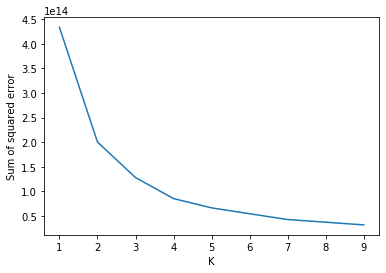

In [64]:
plt.xlabel('K')
plt.ylabel('Sum of squared error')
plt.plot(k_rng,sse)

In [65]:
km = KMeans(n_clusters=4)
cluster_pred = km.fit_predict(cluster_df)
cluster_pred

array([2, 2, 2, ..., 0, 0, 3])

In [66]:
km.cluster_centers_

array([[20172.9804292 , 19154.02795652, 18782.34518578, 19699.71331404,
        19543.19997303, 18816.61218271, 17893.68540722, 16901.42373735,
        15719.82507209, 14579.07559275, 11952.96500474, 11392.89326698,
         8818.78752292,  8230.15744685,  8444.02090169,  9047.03569948,
         9348.24052516, 10324.73238846, 11171.82271677, 12271.09576405,
        11933.34766285, 11432.09921408, 11398.54404618, 12245.10444102,
        12564.66198608, 12481.16718859,  4941.33368872,  4543.63238653,
         5343.95329514,  5834.20815093,  5510.82668142,  5844.17494552,
         6243.99534534,  6813.16034619,  7537.98792897,  8645.22581368,
         9542.66045775, 10553.59380908, 13103.24514005, 13312.64491685,
        13824.21277364, 14472.20947382, 15128.72812233, 15432.27158117,
        16002.98624609, 16966.29517467, 18210.47479922, 21045.08501054,
        22312.14252038, 24021.38234274, 24952.82130295, 27195.07676123,
        29246.58443488, 30503.36805918, 31394.99917646, 31573.62

In [67]:
cluster_df['clusters']=cluster_pred
cluster_df.head()

C:\Users\hanit\anaconda3\lib\site-packages\ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  """Entry point for launching an IPython kernel.


,Jurong East MRT station,Bukit Batok MRT station,Bukit Gombak MRT station,Choa Chu Kang MRT station,Yew Tee MRT station,Kranji MRT station,Marsiling MRT station,Woodlands MRT station,Admiralty MRT station,Sembawang MRT station,...,Geylang Bahru MRT Station,Mattar MRT station,Ubi MRT station,Kaki Bukit MRT Station,Bedok North MRT station,Bedok Reservoir MRT station,Tampines West MRT station,Tampines East MRT station,Upper Changi MRT station,clusters
0,11477.78323,10141.0331,9584.116214,10326.99886,10221.75873,10017.97357,9468.082893,8895.160692,8335.870022,8477.18387,...,7076.419886,7368.404889,8633.054865,9181.288024,10097.60426,11482.59923,11746.91309,13278.94819,14345.68675,2
1,11477.78323,10141.0331,9584.116214,10326.99886,10221.75873,10017.97357,9468.082893,8895.160692,8335.870022,8477.18387,...,7076.419886,7368.404889,8633.054865,9181.288024,10097.60426,11482.59923,11746.91309,13278.94819,14345.68675,2
2,11477.78323,10141.0331,9584.116214,10326.99886,10221.75873,10017.97357,9468.082893,8895.160692,8335.870022,8477.18387,...,7076.419886,7368.404889,8633.054865,9181.288024,10097.60426,11482.59923,11746.91309,13278.94819,14345.68675,2
3,11477.78323,10141.0331,9584.116214,10326.99886,10221.75873,10017.97357,9468.082893,8895.160692,8335.870022,8477.18387,...,7076.419886,7368.404889,8633.054865,9181.288024,10097.60426,11482.59923,11746.91309,13278.94819,14345.68675,2
4,11477.78323,10141.0331,9584.116214,10326.99886,10221.75873,10017.97357,9468.082893,8895.160692,8335.870022,8477.18387,...,7076.419886,7368.404889,8633.054865,9181.288024,10097.60426,11482.59923,11746.91309,13278.94819,14345.68675,2


In [68]:
col = Final_df.columns[12:]

In [69]:
df_dropped = Final_df.drop(col, axis = 1)

In [70]:
df_dropped

,month,town,flat_type,block,street_name,storey_range,floor_area_sqm,flat_model,lease_commence_date,resale_price,uniqueID,remaining_lease
0,2012.0,ANG MO KIO,2 ROOM,172,ANG MO KIO AVE 4,10.0,45.0,Improved,1986.0,250000.0,100000.0,73.0
1,2012.0,ANG MO KIO,3 ROOM,172,ANG MO KIO AVE 4,10.0,60.0,Improved,1986.0,302500.0,102362.0,73.0
2,2012.0,ANG MO KIO,3 ROOM,172,ANG MO KIO AVE 4,10.0,60.0,Improved,1986.0,295000.0,104517.0,73.0
3,2012.0,ANG MO KIO,2 ROOM,172,ANG MO KIO AVE 4,6.0,45.0,Improved,1986.0,259000.0,106838.0,73.0
4,2012.0,ANG MO KIO,2 ROOM,172,ANG MO KIO AVE 4,9.0,45.0,Improved,1986.0,263000.0,111011.0,73.0
...,...,...,...,...,...,...,...,...,...,...,...,...
121929,2018.0,PUNGGOL,4 ROOM,212A,PUNGGOL WALK,15.0,93.0,Model A,2015.0,460000.0,220874.0,96.0
121930,2018.0,PUNGGOL,5 ROOM,213A,PUNGGOL WALK,12.0,113.0,Improved,2015.0,590000.0,220947.0,96.0
121931,2018.0,SENGKANG,4 ROOM,430B,FERNVALE LINK,21.0,92.0,Model A,2015.0,430000.0,221158.0,96.0
121932,2018.0,SENGKANG,4 ROOM,430A,FERNVALE LINK,3.0,92.0,Model A,2015.0,388000.0,221161.0,96.0


In [71]:
df_dropped['clusters'] = cluster_df['clusters']

In [72]:
del df_dropped['street_name']

In [73]:
df_dropped.head(3)

,month,town,flat_type,block,storey_range,floor_area_sqm,flat_model,lease_commence_date,resale_price,uniqueID,remaining_lease,clusters
0,2012.0,ANG MO KIO,2 ROOM,172,10.0,45.0,Improved,1986.0,250000.0,100000.0,73.0,2
1,2012.0,ANG MO KIO,3 ROOM,172,10.0,60.0,Improved,1986.0,302500.0,102362.0,73.0,2
2,2012.0,ANG MO KIO,3 ROOM,172,10.0,60.0,Improved,1986.0,295000.0,104517.0,73.0,2


In [74]:
df_dropped.dtypes

month                   float64
town                   category
flat_type              category
block                  category
storey_range            float64
floor_area_sqm          float64
flat_model             category
lease_commence_date     float64
resale_price            float64
uniqueID                float64
remaining_lease         float64
clusters                  int32
dtype: object

#### Type Conversion

In [75]:
df_dropped['clusters'] = df_dropped['clusters'].astype('category')

In [76]:
df_dropped.dtypes

month                   float64
town                   category
flat_type              category
block                  category
storey_range            float64
floor_area_sqm          float64
flat_model             category
lease_commence_date     float64
resale_price            float64
uniqueID                float64
remaining_lease         float64
clusters               category
dtype: object

## Train-Validation split

In [77]:
from sklearn.model_selection import train_test_split

Y = df_dropped["resale_price"]
X = df_dropped.drop('resale_price', axis=1)
X_train, X_val, Y_train, Y_val = train_test_split(X, Y, test_size=0.20,random_state=123)

In [78]:
X_train.columns

Index(['month', 'town', 'flat_type', 'block', 'storey_range', 'floor_area_sqm',
       'flat_model', 'lease_commence_date', 'uniqueID', 'remaining_lease',
       'clusters'],
      dtype='object')

In [79]:
X_train.drop(['block'], axis = 1, inplace=True) 
X_val.drop(['block'], axis = 1, inplace=True) 

C:\Users\hanit\anaconda3\lib\site-packages\pandas\core\frame.py:3997: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  errors=errors,


In [80]:
numAttributes = X_train.select_dtypes(['int64','float64']).columns
catAttributes = X_train.select_dtypes('category').columns

In [81]:
print('Number of Numerical attributes: ', len(numAttributes))

print("Number of Categorical attributes: ", len(catAttributes))
print(catAttributes)

Number of Numerical attributes:  6
Number of Categorical attributes:  4
Index(['town', 'flat_type', 'flat_model', 'clusters'], dtype='object')


### Handling of Numerical variables
####  Standardizing the Numerical columns of Train and ValidAtion

In [82]:
from sklearn.preprocessing import StandardScaler

In [83]:
numAttributes

Index(['month', 'storey_range', 'floor_area_sqm', 'lease_commence_date',
       'uniqueID', 'remaining_lease'],
      dtype='object')

In [84]:
scaler = StandardScaler()

scaler.fit(X_train[numAttributes])

X_train[numAttributes]=scaler.transform(X_train[numAttributes])
X_val[numAttributes]=scaler.transform(X_val[numAttributes])

C:\Users\hanit\anaconda3\lib\site-packages\ipykernel_launcher.py:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  """
C:\Users\hanit\anaconda3\lib\site-packages\pandas\core\indexing.py:965: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self.obj[item] = s
C:\Users\hanit\anaconda3\lib\site-packages\ipykernel_launcher.py:6: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: ht

### Handling of categorical variables

#### LabelEncoding

In [85]:
from sklearn import preprocessing 
label_encoder = preprocessing.LabelEncoder() 

In [86]:
catAttributes

Index(['town', 'flat_type', 'flat_model', 'clusters'], dtype='object')

In [87]:
#Label encoding for training data
X_train['flat_type'] = label_encoder.fit_transform(X_train['flat_type'])
X_train['flat_model'] = label_encoder.fit_transform(X_train['flat_model'])
#X_train['street_name'] = label_encoder.fit_transform(X_train['street_name'])
X_train['town'] = label_encoder.fit_transform(X_train['town'])
X_train['clusters'] = label_encoder.fit_transform(X_train['clusters'])



#Label Encoding for validatoion data
X_val['flat_type'] = label_encoder.fit_transform(X_val['flat_type'])
X_val['flat_model'] = label_encoder.fit_transform(X_val['flat_model'])
#X_val['street_name'] = label_encoder.fit_transform(X_val['street_name'])
X_val['town'] = label_encoder.fit_transform(X_val['town'])
X_val['clusters'] = label_encoder.fit_transform(X_val['clusters'])

C:\Users\hanit\anaconda3\lib\site-packages\ipykernel_launcher.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  
C:\Users\hanit\anaconda3\lib\site-packages\ipykernel_launcher.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  This is separate from the ipykernel package so we can avoid doing imports until
C:\Users\hanit\anaconda3\lib\site-packages\ipykernel_launcher.py:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = v

In [88]:
X_train.shape

(97547, 10)

In [89]:
Final_df.street_name[:5]

0    ANG MO KIO AVE 4
1    ANG MO KIO AVE 4
2    ANG MO KIO AVE 4
3    ANG MO KIO AVE 4
4    ANG MO KIO AVE 4
Name: street_name, dtype: category
Categories (527, object): [ADMIRALTY DR, ADMIRALTY LINK, AH HOOD RD, ALJUNIED CRES, ..., YUNG LOH RD, YUNG PING RD, YUNG SHENG RD, ZION RD]

#### OneHotEncoding

In [90]:
from sklearn.preprocessing import OneHotEncoder

In [91]:
# import OneHotEncoder
from sklearn.preprocessing import OneHotEncoder
# instantiate OneHotEncoder
ohe = OneHotEncoder(sparse=False) 
# categorical_features = boolean mask for categorical columns
# sparse = False output an array not sparse matrix

In [92]:
# X_train = ohe.fit_transform(X_train).toarray()
# X_train
print (len(catAttributes))

4


In [93]:
#OneHotEncoding for training data
temp = X_train[catAttributes].values
temp = temp.reshape(len(temp), 4)


#OneHotEncoding for validation data
temp1 = X_val[catAttributes].values
temp1 = temp1.reshape(len(temp1), 4)

In [94]:
#OHE fit on training data
onehot_encoder = OneHotEncoder(sparse=False)
onehot_encoded = pd.DataFrame(onehot_encoder.fit_transform(temp))

#OHE fit on validation data
onehot_encoder = OneHotEncoder(sparse=False)
onehot_encoded_val = pd.DataFrame(onehot_encoder.fit_transform(temp1))

In [95]:
onehot_encoded.shape, X_train.shape

((97547, 58), (97547, 10))

In [96]:
onehot_encoded_val.shape, X_val.shape

((24387, 57), (24387, 10))

In [97]:
onehot_encoded.head(2)

,0,1,2,3,4,5,6,7,8,9,...,48,49,50,51,52,53,54,55,56,57
0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0
1,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0


In [98]:
X_val.head(2)

,month,town,flat_type,storey_range,floor_area_sqm,flat_model,lease_commence_date,uniqueID,remaining_lease,clusters
51787,-0.615076,22,3,-0.593030,0.283413,6,-0.261848,-0.779366,-0.149128,0
4884,0.910719,2,4,1.103677,0.974682,3,-0.353105,0.929747,-0.515519,2


In [99]:
X_train.drop(['flat_model', 'flat_type', 'town','clusters'], axis = 1, inplace=True) 
X_val.drop(['flat_model', 'flat_type', 'town','clusters'], axis = 1, inplace=True) 

C:\Users\hanit\anaconda3\lib\site-packages\pandas\core\frame.py:3997: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  errors=errors,


In [100]:
del X_train['uniqueID']
del X_val['uniqueID']

In [101]:
X_train.head()

,month,storey_range,floor_area_sqm,lease_commence_date,remaining_lease
9065,-1.632273,2.046292,0.568053,1.015747,1.316436
17943,0.910719,-0.593030,-0.936473,-0.626876,-0.790313
60994,1.419317,-1.158599,-0.245204,0.650720,0.400458
116437,0.402120,-0.027461,-0.082553,1.837059,1.866023
18368,-1.123675,-0.027461,1.137333,1.015747,1.224838


In [102]:
X_train.shape, X_val.shape

((97547, 5), (24387, 5))

#### Creating a new column 'Index'

In [103]:
# To merge x_train with OneHotEncoded df creating index column

In [104]:
#Creating index for X_train df
X_train.reset_index(inplace=True)
X_train['index'] = X_train.index
X_train.shape


#Creating for validation data
X_val.reset_index(inplace=True)
X_val['index'] = X_val.index
X_val.shape

C:\Users\hanit\anaconda3\lib\site-packages\ipykernel_launcher.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  This is separate from the ipykernel package so we can avoid doing imports until
C:\Users\hanit\anaconda3\lib\site-packages\ipykernel_launcher.py:9: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  if __name__ == '__main__':


(24387, 6)

In [105]:
#Creating for OneHotencoded training data
onehot_encoded.reset_index(inplace=True)
onehot_encoded['index'] = X_train.index


#Creating for OneHotencoded_validation data
onehot_encoded_val.reset_index(inplace=True)
onehot_encoded_val['index'] = X_val.index

In [106]:
onehot_encoded.shape,X_train.shape

((97547, 59), (97547, 6))

#### Concating Num and Cat attributes

In [107]:
x_train_merge = pd.merge(X_train,onehot_encoded, how = 'outer', on = 'index')
x_train_merge.shape

(97547, 64)

In [108]:
x_val_merge = pd.merge(X_val,onehot_encoded_val, how = 'outer', on = 'index')
x_val_merge.shape

(24387, 63)

In [109]:
#inserting a column with static value in Validatation data frame 
x_val_merge.insert(63, "extra1", 0) 

In [110]:
x_val_merge.shape

(24387, 64)

# OLS Regression

In [111]:
import statsmodels.api as sm

In [112]:
type(Y_train), x_train_merge.shape

(pandas.core.series.Series, (97547, 64))

In [113]:
y_train_list = list(Y_train)
y_val_list = list(Y_val)

In [114]:
OLS_models = sm.OLS(y_train_list,x_train_merge).fit()

In [115]:
OLS_models.summary2()

<class 'statsmodels.iolib.summary2.Summary'>
"""
                           Results: Ordinary least squares
=====================================================================================
Model:                    OLS                   Adj. R-squared:          0.854       
Dependent Variable:       y                     AIC:                     2395247.6225
Date:                     2020-05-25 08:29      BIC:                     2395807.4198
No. Observations:         97547                 Log-Likelihood:          -1.1976e+06 
Df Model:                 58                    F-statistic:             9807.       
Df Residuals:             97488                 Prob (F-statistic):      0.00        
R-squared:                0.854                 Scale:                   2.6995e+09  
-------------------------------------------------------------------------------------
                       Coef.      Std.Err.     t     P>|t|     [0.025       0.975]   
-------------------------------------------------------------------------------------
index                    -0.0065     0.0059  -1.1062 0.2687      -0.0181       0.0050
month                 -6419.0804   883.8892  -7.2623 0.0000   -8151.4929   -4686.6679
storey_range          22339.7474   183.1970 121.9439 0.0000   21980.6835   22698.8114
floor_area_sqm        74324.3152   739.9198 100.4492 0.0000   72874.0811   75774.5493
lease_commence_date  -26169.7666  4919.5880  -5.3195 0.0000  -35812.1017  -16527.4314
remaining_lease       67725.7323  4886.6288  13.8594 0.0000   58147.9970   77303.4677
0                     40732.6665  2255.1066  18.0624 0.0000   36312.6838   45152.6491
1                     58949.6160  2383.5105  24.7323 0.0000   54277.9633   63621.2688
2                    113547.9051  2435.1688  46.6284 0.0000  108775.0028  118320.8074
3                    -40422.3658  4915.2261  -8.2239 0.0000  -50056.1515  -30788.5801
4                    134751.3930  2251.2579  59.8560 0.0000  130338.9539  139163.8322
5                    -93930.9619  4925.6158 -19.0699 0.0000 -103585.1114  -84276.8124
6                    210645.4232  4143.4678  50.8380 0.0000  202524.2747  218766.5718
7                    128253.6711  2958.9016  43.3450 0.0000  122454.2585  134053.0838
8                   -123109.9201  4911.6191 -25.0650 0.0000 -132736.6362 -113483.2040
9                     65279.8482  4966.6280  13.1437 0.0000   55545.3153   75014.3811
10                    67525.5495  2244.7145  30.0820 0.0000   63125.9353   71925.1637
11                      139.9287  2332.9349   0.0600 0.9522   -4432.5966    4712.4539
12                   -22085.1909  4964.3215  -4.4488 0.0000  -31815.2030  -12355.1788
13                   -82495.0136  4883.0836 -16.8940 0.0000  -92065.8005  -72924.2267
14                    79363.9048  2291.0709  34.6405 0.0000   74873.4326   83854.3769
15                   217793.1139  3019.5956  72.1266 0.0000  211874.7417  223711.4861
16                   -30577.6356  2463.1429 -12.4141 0.0000  -35405.3670  -25749.9042
17                   -39870.6311  2461.8709 -16.1953 0.0000  -44695.8693  -35045.3930
18                   141922.2841  2314.3780  61.3220 0.0000  137386.1303  146458.4380
19                    23635.0267   978.9279  24.1438 0.0000   21716.3394   25553.7140
20                   -44401.0071  2397.3973 -18.5205 0.0000  -49099.8778  -39702.1364
21                    30229.2755  2382.2540  12.6894 0.0000   25560.0856   34898.4655
22                    26888.5342  2376.1615  11.3160 0.0000   22231.2853   31545.7831
23                    77729.8113  2284.6074  34.0233 0.0000   73252.0074   82207.6151
24                    44698.1653   740.2862  60.3796 0.0000   43247.2130   46149.1177
25                    97435.5534   786.0667 123.9533 0.0000   95894.8718   98976.2350
26                    72868.8821  6498.2946  11.2135 0.0000   60132.3005   85605.4637
27                   112197.0291  2379.1119  47.1592 0.0000  107533.9976  116860.0606
28                   1

In [116]:
train_OLS_Pred = OLS_models.predict(x_train_merge)
test_OLS_Pred = OLS_models.predict(x_val_merge)

In [117]:
def mean_absolute_percentage_error(y_true, y_pred): 
    y_true, y_pred = np.array(y_true), np.array(y_pred)
    return np.mean(np.abs((y_true - y_pred) / y_true)) * 100

In [118]:
print("mean_absolute_percentage_error TRAIN",mean_absolute_percentage_error(Y_train,train_OLS_Pred))
print("mean_absolute_percentage_error TEST",mean_absolute_percentage_error(Y_val,test_OLS_Pred))

mean_absolute_percentage_error TRAIN 9.164535817247813
mean_absolute_percentage_error TEST 28.208811051681838


In [119]:
#Checking error for constannt variance:
modelResidual = OLS_models.resid

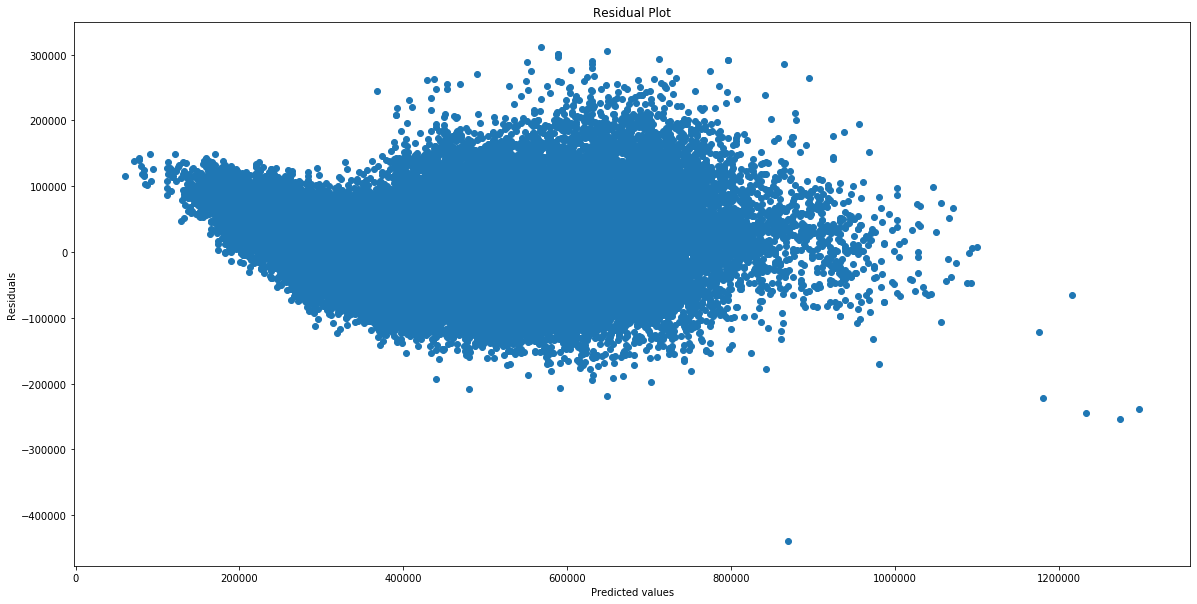

In [120]:
fig = plt.figure(figsize=(20,10))
plt.scatter(train_OLS_Pred,modelResidual)
plt.title( "Residual Plot" );
plt.xlabel( "Predicted values")
plt.ylabel( "Residuals");

In [121]:
def residual_plots(model):
    # fitted values (need a constant term for intercept)
    model_fitted_y = model.fittedvalues

    # model residuals
    model_residuals = model.resid

    # normalized residuals
    model_norm_residuals = model.get_influence().resid_studentized_internal

    # absolute squared normalized residuals
    model_norm_residuals_abs_sqrt = np.sqrt(np.abs(model_norm_residuals))

    # absolute residuals
    model_abs_resid = np.abs(model_residuals)

    # leverage, from statsmodels internals
    model_leverage = model.get_influence().hat_matrix_diag

    # cook's distance, from statsmodels internals
    model_cooks = model.get_influence().cooks_distance[0]


    plot_lm_1 = plt.figure(1)
    

    plot_lm_1.axes[0] = sns.regplot(model_fitted_y, model_residuals, 
                          lowess=True, 
                          scatter_kws={'alpha': 0.5}, 
                          line_kws={'color': 'red', 'lw': 1, 'alpha': 0.8})

    plot_lm_1.axes[0].set_title('Residuals vs Fitted')
    plot_lm_1.axes[0].set_xlabel('Fitted values')
    plot_lm_1.axes[0].set_ylabel('Residuals')

    # annotations
    abs_resid = model_abs_resid.sort_values(ascending=False)
    abs_resid_top_3 = abs_resid[:3]

    for i in abs_resid_top_3.index:
        plot_lm_1.axes[0].annotate(i,xy=(model_fitted_y[i],model_residuals[i]));
    
    
    QQ = ProbPlot(model_norm_residuals)
    plot_lm_2 = QQ.qqplot(line='45', alpha=0.5, color='#4C72B0', lw=1)


    plot_lm_2.axes[0].set_title('Normal Q-Q')
    plot_lm_2.axes[0].set_xlabel('Theoretical Quantiles')
    plot_lm_2.axes[0].set_ylabel('Standardized Residuals');

    # annotations
    abs_norm_resid = np.flip(np.argsort(np.abs(model_norm_residuals)), 0)
    abs_norm_resid_top_3 = abs_norm_resid[:3]

    for r, i in enumerate(abs_norm_resid_top_3):
        plot_lm_2.axes[0].annotate(i, xy=(np.flip(QQ.theoretical_quantiles, 0)[r],model_norm_residuals[i]));
    
    
    plot_lm_3 = plt.figure(3)
    plot_lm_3.axes[0] = sns.regplot(model_fitted_y, model_norm_residuals_abs_sqrt,lowess=True,scatter_kws={'alpha': 0.5}, 
                          line_kws={'color': 'red', 'lw': 1, 'alpha': 0.8})

    plot_lm_3.axes[0].set_title('Normalized Residuals vs Fitted')
    plot_lm_3.axes[0].set_xlabel('Fitted values')
    plot_lm_3.axes[0].set_ylabel('Normalized Residuals')

#     # annotations
#     abs_resid = model_abs_resid.sort_values(ascending=False)
#     abs_resid_top_3 = abs_resid[:3]
    

#     for i in abs_resid_top_3.index:
#         plot_lm_3.axes[0].annotate(i, xy=(model_fitted_y[i], model_residuals[i]));
    
    plot_lm_4 = plt.figure(4)


    plt.scatter(model_leverage, model_norm_residuals, alpha=0.5)
    sns.regplot(model_leverage, model_norm_residuals, 
            scatter=False, 
            ci=False, 
            lowess=True,
            line_kws={'color': 'red', 'lw': 1, 'alpha': 0.8})

    plot_lm_4.axes[0].set_xlim(0, 0.20)
    plot_lm_4.axes[0].set_ylim(-3, 5)
    plot_lm_4.axes[0].set_title('Residuals vs Leverage')
    plot_lm_4.axes[0].set_xlabel('Leverage')
    plot_lm_4.axes[0].set_ylabel('Standardized Residuals')

    # annotations
    leverage_top_3 = np.flip(np.argsort(model_cooks), 0)[:3]

    for i in leverage_top_3:
        plot_lm_4.axes[0].annotate(i,xy=(model_leverage[i],model_norm_residuals[i]))
    
    # shenanigans for cook's distance contours
    def graph(formula, x_range, label=None):
        x = x_range
        y = formula(x)
        plt.plot(x, y, label=label, lw=1, ls='--', color='red')

    p = len(model.params) # number of model parameters

    graph(lambda x: np.sqrt((0.5 * p * (1 - x)) / x),np.linspace(0.001, 0.200, 50),'Cook\'s distance') # 0.5 line
    graph(lambda x: np.sqrt((1 * p * (1 - x)) / x),np.linspace(0.001, 0.200, 50)) # 1 line

In [122]:
import seaborn as sns
from statsmodels.graphics.gofplots import ProbPlot

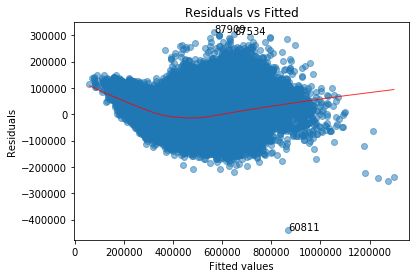

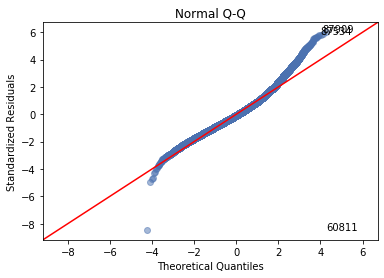

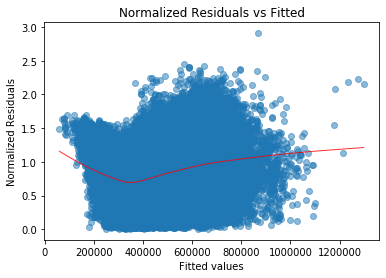

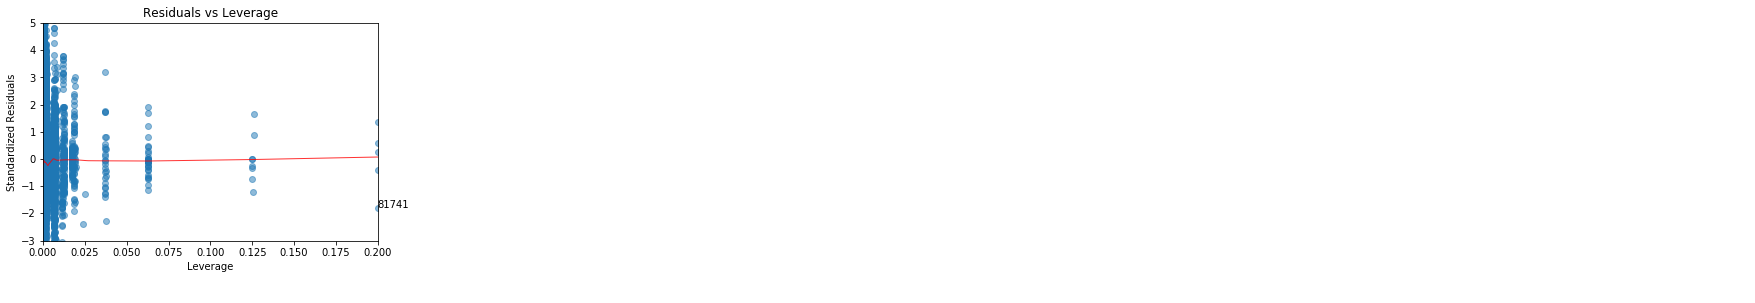

In [123]:
residual_plots(OLS_models)

In [125]:
def cooksd_plot(model):
    # fitted values (need a constant term for intercept)
    model_fitted_y = model.fittedvalues

    # model residuals
    model_residuals = model.resid

    # normalized residuals
    model_norm_residuals = model.get_influence().resid_studentized_internal

    # absolute squared normalized residuals
    model_norm_residuals_abs_sqrt = np.sqrt(np.abs(model_norm_residuals))

    # absolute residuals
    model_abs_resid = np.abs(model_residuals)

    # leverage, from statsmodels internals
    model_leverage = model.get_influence().hat_matrix_diag

    # cook's distance, from statsmodels internals
    model_cooks = model.get_influence().cooks_distance[0]
    
    plot_lm_4 = plt.figure(1,figsize=(8, 6), dpi=80)


    plt.scatter(model_leverage, model_norm_residuals, alpha=0.5)
    sns.regplot(model_leverage, model_norm_residuals, 
            scatter=False, 
            ci=False, 
            lowess=True,
            line_kws={'color': 'red', 'lw': 1, 'alpha': 0.8})

    plot_lm_4.axes[0].set_xlim(0, 0.20)
    plot_lm_4.axes[0].set_ylim(-3, 5)
    plot_lm_4.axes[0].set_title('Residuals vs Leverage')
    plot_lm_4.axes[0].set_xlabel('Leverage')
    plot_lm_4.axes[0].set_ylabel('Standardized Residuals')

    # annotations
    leverage_top_3 = np.flip(np.argsort(model_cooks), 0)[:3]

    for i in leverage_top_3:
        plot_lm_4.axes[0].annotate(i,xy=(model_leverage[i],model_norm_residuals[i]))
    
    # shenanigans for cook's distance contours
    def graph(formula, x_range, label=None):
        x = x_range
        y = formula(x)
        plt.plot(x, y, label=label, lw=1, ls='--', color='red')

    p = len(model.params) # number of model parameters

    graph(lambda x: np.sqrt((0.5 * p * (1 - x)) / x),np.linspace(0.001, 0.200, 50),'Cook\'s distance') # 0.5 line
    graph(lambda x: np.sqrt((1 * p * (1 - x)) / x),np.linspace(0.001, 0.200, 50)) # 1 line
    



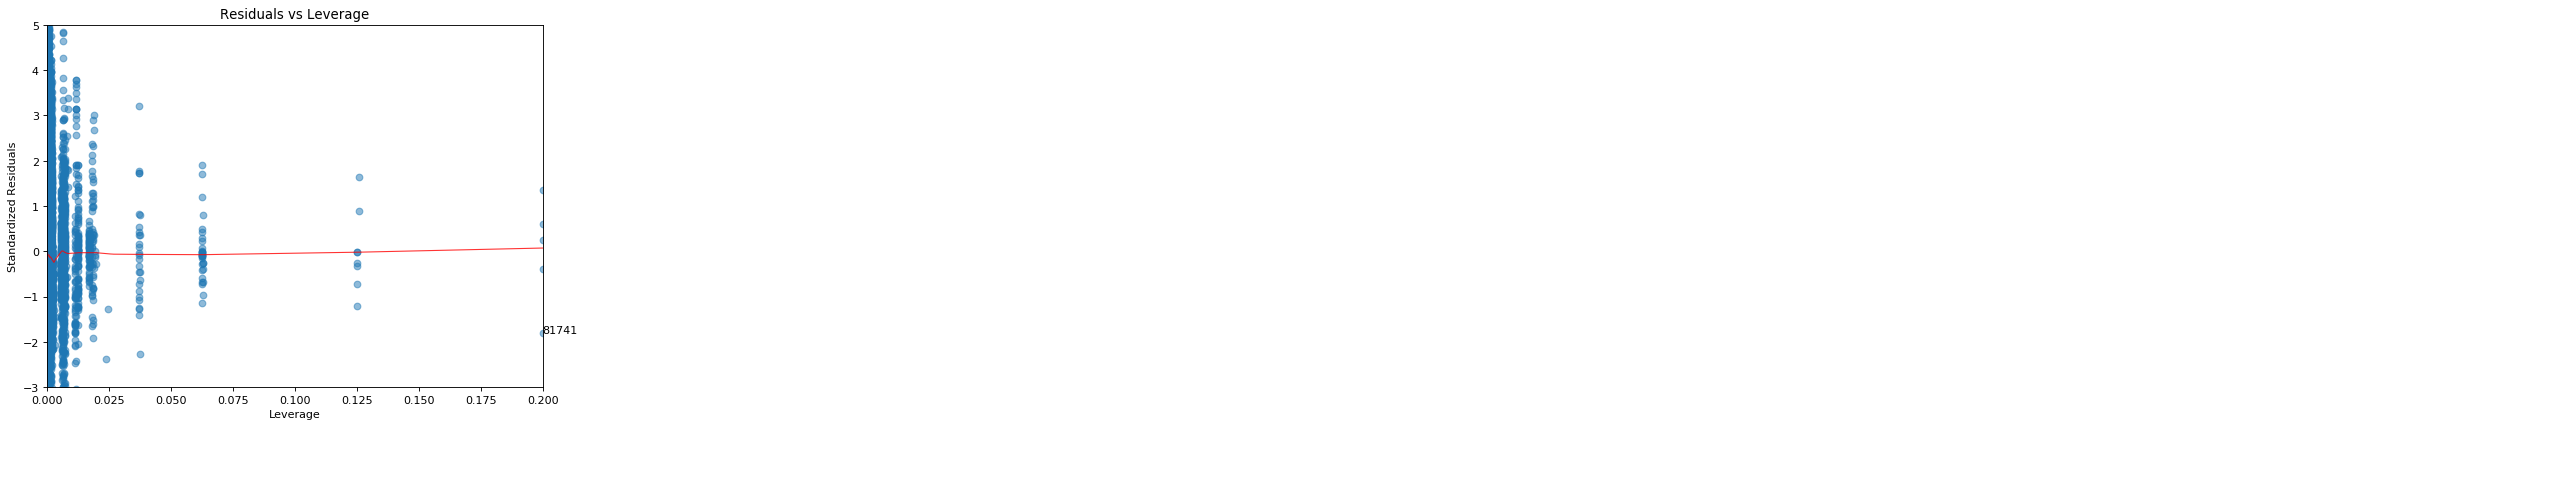

In [135]:
cooksd_plot(OLS_models)

## Regularization

In [136]:
from sklearn import linear_model
from sklearn.linear_model import Ridge
from sklearn.linear_model import Lasso
from sklearn.linear_model import ElasticNet
from sklearn.model_selection import GridSearchCV

### Ridge

In [137]:
from sklearn.model_selection import GridSearchCV


In [138]:
ridge1 = Ridge()

In [139]:
parameters = {'alpha': [1e-15, 1e-10, 1e-8, 1e-4, 1e-3, 1e-2, 1,5,10,20]}
ridge_reg = GridSearchCV(ridge1, parameters,cv = 5)

In [140]:
ridge_reg.fit(x_train_merge,Y_train)

C:\Users\hanit\anaconda3\lib\site-packages\sklearn\linear_model\_ridge.py:148: LinAlgWarning: Ill-conditioned matrix (rcond=1.6645e-24): result may not be accurate.
  overwrite_a=True).T
C:\Users\hanit\anaconda3\lib\site-packages\sklearn\linear_model\_ridge.py:148: LinAlgWarning: Ill-conditioned matrix (rcond=6.29804e-25): result may not be accurate.
  overwrite_a=True).T
C:\Users\hanit\anaconda3\lib\site-packages\sklearn\linear_model\_ridge.py:148: LinAlgWarning: Ill-conditioned matrix (rcond=1.23064e-24): result may not be accurate.
  overwrite_a=True).T
C:\Users\hanit\anaconda3\lib\site-packages\sklearn\linear_model\_ridge.py:148: LinAlgWarning: Ill-conditioned matrix (rcond=6.67315e-25): result may not be accurate.
  overwrite_a=True).T
C:\Users\hanit\anaconda3\lib\site-packages\sklearn\linear_model\_ridge.py:148: LinAlgWarning: Ill-conditioned matrix (rcond=1.1682e-24): result may not be accurate.
  overwrite_a=True).T
C:\Users\hanit\anaconda3\lib\site-packages\sklearn\linear_mode

GridSearchCV(cv=5, error_score=nan,
             estimator=Ridge(alpha=1.0, copy_X=True, fit_intercept=True,
                             max_iter=None, normalize=False, random_state=None,
                             solver='auto', tol=0.001),
             iid='deprecated', n_jobs=None,
             param_grid={'alpha': [1e-15, 1e-10, 1e-08, 0.0001, 0.001, 0.01, 1,
                                   5, 10, 20]},
             pre_dispatch='2*n_jobs', refit=True, return_train_score=False,
             scoring=None, verbose=0)

In [141]:
print(ridge_reg.best_params_)
print(ridge_reg.best_score_)

{'alpha': 0.01}
0.8534063752499899


### Lasso

In [142]:
lasso = Lasso()

In [143]:
parameters = {'alpha': [1e-15, 1e-10, 1e-8, 1e-4, 1e-3, 1e-2, 1,5,10,20]}
lasso_reg = GridSearchCV(lasso, parameters,cv = 5)

In [144]:
lasso_reg.fit(x_train_merge,Y_train)

C:\Users\hanit\anaconda3\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:476: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 105215452986875.84, tolerance: 143078925950.10754
  positive)
C:\Users\hanit\anaconda3\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:476: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 105780519883192.22, tolerance: 144561077069.51013
  positive)
C:\Users\hanit\anaconda3\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:476: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 105608356244310.16, tolerance: 144457894853.36215
  positive)
C:\Users\hanit\anaconda3\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:476: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Dua

C:\Users\hanit\anaconda3\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:476: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 102335012226912.55, tolerance: 144561077069.51013
  positive)
C:\Users\hanit\anaconda3\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:476: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 103558559126559.88, tolerance: 144457894853.36215
  positive)
C:\Users\hanit\anaconda3\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:476: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 96026713267123.88, tolerance: 144205229140.43454
  positive)
C:\Users\hanit\anaconda3\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:476: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Dual

GridSearchCV(cv=5, error_score=nan,
             estimator=Lasso(alpha=1.0, copy_X=True, fit_intercept=True,
                             max_iter=1000, normalize=False, positive=False,
                             precompute=False, random_state=None,
                             selection='cyclic', tol=0.0001, warm_start=False),
             iid='deprecated', n_jobs=None,
             param_grid={'alpha': [1e-15, 1e-10, 1e-08, 0.0001, 0.001, 0.01, 1,
                                   5, 10, 20]},
             pre_dispatch='2*n_jobs', refit=True, return_train_score=False,
             scoring=None, verbose=0)

In [145]:
print(lasso_reg.best_params_)
print(lasso_reg.best_score_)

{'alpha': 0.01}
0.853375254864518


### Plotting Ridge co-efficients

In [146]:
from sklearn.datasets import make_regression
from sklearn.linear_model import Ridge
from sklearn.metrics import mean_squared_error

In [147]:
clf = Ridge()

In [148]:
x_train_merge.shape

(97547, 64)

In [149]:
X, y, w = make_regression(n_samples=97547, n_features=64, coef=True,
                          random_state=1, bias=3.5)

In [150]:
coefs = []
errors = []

alphas = np.logspace(-6, 6, 200)

# Train the model with different regularisation strengths
for a in alphas:
    clf.set_params(alpha=a)
    clf.fit(x_train_merge, Y_train)
    coefs.append(clf.coef_)
    errors.append(mean_squared_error(clf.coef_,w))

C:\Users\hanit\anaconda3\lib\site-packages\sklearn\linear_model\_ridge.py:148: LinAlgWarning: Ill-conditioned matrix (rcond=5.95914e-21): result may not be accurate.
  overwrite_a=True).T
C:\Users\hanit\anaconda3\lib\site-packages\sklearn\linear_model\_ridge.py:148: LinAlgWarning: Ill-conditioned matrix (rcond=6.84675e-21): result may not be accurate.
  overwrite_a=True).T
C:\Users\hanit\anaconda3\lib\site-packages\sklearn\linear_model\_ridge.py:148: LinAlgWarning: Ill-conditioned matrix (rcond=7.86658e-21): result may not be accurate.
  overwrite_a=True).T
C:\Users\hanit\anaconda3\lib\site-packages\sklearn\linear_model\_ridge.py:148: LinAlgWarning: Ill-conditioned matrix (rcond=9.0383e-21): result may not be accurate.
  overwrite_a=True).T
C:\Users\hanit\anaconda3\lib\site-packages\sklearn\linear_model\_ridge.py:148: LinAlgWarning: Ill-conditioned matrix (rcond=1.03846e-20): result may not be accurate.
  overwrite_a=True).T
C:\Users\hanit\anaconda3\lib\site-packages\sklearn\linear_mod

C:\Users\hanit\anaconda3\lib\site-packages\sklearn\linear_model\_ridge.py:148: LinAlgWarning: Ill-conditioned matrix (rcond=6.3965e-18): result may not be accurate.
  overwrite_a=True).T
C:\Users\hanit\anaconda3\lib\site-packages\sklearn\linear_model\_ridge.py:148: LinAlgWarning: Ill-conditioned matrix (rcond=7.34927e-18): result may not be accurate.
  overwrite_a=True).T
C:\Users\hanit\anaconda3\lib\site-packages\sklearn\linear_model\_ridge.py:148: LinAlgWarning: Ill-conditioned matrix (rcond=8.44394e-18): result may not be accurate.
  overwrite_a=True).T
C:\Users\hanit\anaconda3\lib\site-packages\sklearn\linear_model\_ridge.py:148: LinAlgWarning: Ill-conditioned matrix (rcond=9.70168e-18): result may not be accurate.
  overwrite_a=True).T
C:\Users\hanit\anaconda3\lib\site-packages\sklearn\linear_model\_ridge.py:148: LinAlgWarning: Ill-conditioned matrix (rcond=1.11467e-17): result may not be accurate.
  overwrite_a=True).T
C:\Users\hanit\anaconda3\lib\site-packages\sklearn\linear_mod

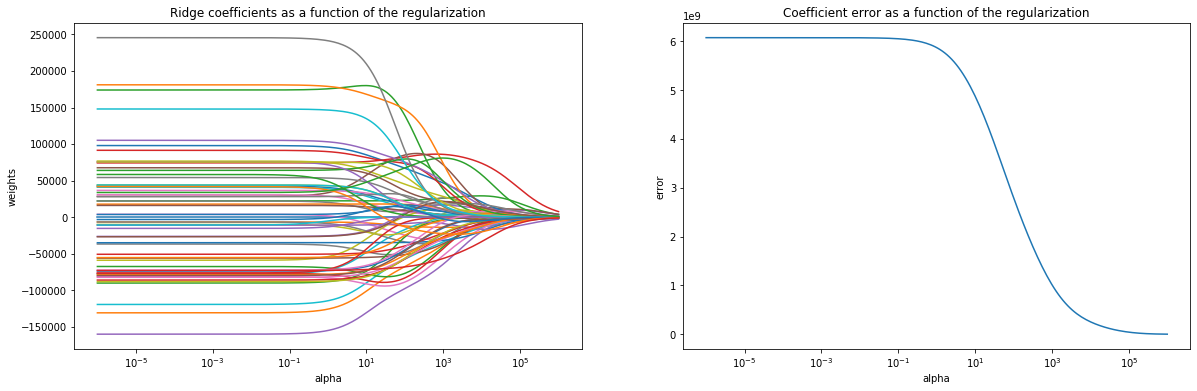

In [151]:

# Display results
plt.figure(figsize=(20, 6))

plt.subplot(121)
ax = plt.gca()
ax.plot(alphas, coefs)
ax.set_xscale('log')
plt.xlabel('alpha')
plt.ylabel('weights')
plt.title('Ridge coefficients as a function of the regularization')
plt.axis('tight')


plt.subplot(122)
ax = plt.gca()
ax.plot(alphas, errors)
ax.set_xscale('log')
plt.xlabel('alpha')
plt.ylabel('error')
plt.title('Coefficient error as a function of the regularization')
plt.axis('tight')

plt.show()

### Plug gridsearch alpha of ridge and Lasso into ridge regressor
#### Lasso regression

In [152]:
lassoRegression = Lasso(alpha=1500)

In [153]:
lassoRegression.fit(x_train_merge,Y_train)

Lasso(alpha=1500, copy_X=True, fit_intercept=True, max_iter=1000,
      normalize=False, positive=False, precompute=False, random_state=None,
      selection='cyclic', tol=0.0001, warm_start=False)

In [154]:
lasso_trainPred = lassoRegression.predict(x_train_merge)
lasso_testPred = lassoRegression.predict(x_val_merge)

In [155]:
print("mean_absolute_percentage_error TRAIN",mean_absolute_percentage_error(Y_train,lasso_trainPred))
print("mean_absolute_percentage_error TEST",mean_absolute_percentage_error(Y_val,lasso_testPred))

mean_absolute_percentage_error TRAIN 11.068460486505064
mean_absolute_percentage_error TEST 18.5371531233399


### RidgeRegression

In [161]:
ridgeRegression = Lasso(alpha=1500)

ridgeRegression.fit(x_train_merge,Y_train)

ridge_trainPred = ridgeRegression.predict(x_train_merge)
ridge_testPred = ridgeRegression.predict(x_val_merge)

print("mean_absolute_percentage_error TRAIN",mean_absolute_percentage_error(Y_train,ridge_trainPred))
print("mean_absolute_percentage_error TEST",mean_absolute_percentage_error(Y_val,ridge_testPred))

mean_absolute_percentage_error TRAIN 11.068460486505064
mean_absolute_percentage_error TEST 18.5371531233399


### OBSERVATION
Setting alpha values  for lasso and ridge reduced overfitting